# 1. 머신러닝 개요

## 1-1. 머신러닝이란?
* 머신러닝(machine learning) : 기계 스스로 데이터를 학습하여 서로 다른 변수 간의 관계를 찾아 나가는 과정
* 해결하려는 문제에 따라 예측(prediction), 분류(classification), 군집(clustering) 알고리즘 등으로 분류됨
* 예측(prediction) : 주가, 환율 등 경제지표 예측 등
* 분류(classification) : 은행에서 고객을 분류하여 대출을 승인하거나 거절하는 문제 등
* 군집(clustering) : 비슷한 소비패턴을 가진 고객 유형을 군집으로 묶어내는 문제 등
* 복잡한 이론보다는 실제 데이터를 가지고 간단한 문제부터 예측해보는 것이 바람직함

## 1-2. 지도 학습 vs 비지도 학습
* 머신러닝은 크게 지도 학습, 비지도 학습 두 가지 유형으로 분류함
* 지도 학습(supervised learning) : 정답 데이터를 다른 데이터와 함께 컴퓨터 알고리즘에 입력하는 방식
* 비지도 학습(unsupervised learning) : 정답 데이터 없이 컴퓨터 알고리즘 스스로 데이터로터 숨은 패턴을 찾아내는 방식

|구분|지도 학습|비지도 학습|
|:--:|:--:|:--:|
|알고리즘|회귀분석, 분류|군집 분석|
|특징|정답을 알고 있는 상태에서 학습<br>모형 평가 방법이 다양한 편|정답이 없는 상태에서 서로 비슷한 데이터를 찾아서 그룹화<br>모형 평가 방법이 제한적|

## 1-3. 머신러닝 프로세스
* 머신러닝 데이터 분석을 시작하기 전에 컴퓨터 알고리즘이 이해할 수 있는 형태로 데이터를 변환하는 작업이 선행되어야 함
* 즉, 분석 대상에 관해 수집한 관측값을 속성을 기준으로 정리
* 따라서 판다스를 이용하여 데이터프레임으로 정리하는 과정이 필요함
* 컴퓨터 알고리즘이 이해할 수 있도록 데이터프레임을 변환한 다음에는 여러 속성 간의 관계를 분석하여 결과를 예측하는 모형을 학습을 통해 찾음
* 훈련 데이터(train data) : 모형 학습에 사용하는 데이터
* 검증 데이터(test data) : 학습을 마친 모형의 예측 능력을 평가하기 위한 데이터
* 데이터 정리 → 데이터 분리(훈련/검증) → 알고리즘 준비 → 모형 학습(훈련 데이터) → 예측(검증 데이터) → 모형 평가 → 모형 활용

# 2. 회귀분석
* 가격, 매출, 주가, 환율, 수량 등 연속적인 값을 갖는 연속적인 값을 갖는 연속 변수를 예측하는데 주로 활용
* 종속 변수, 예측 변수 : 분석 모형이 예측하고자 하는 목표
* 독립 변수, 설명 변수 : 예측을 위해 모형이 사용하는 속성

## 2-1. 단순회귀분석
* 단순회귀분석(Simple Linear Regression) : 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘
* 대표적인 지도학습 유형
* 수학적으로 종속 변수 Y와 독립 변수 X 사이의 관계를 1차함수 Y = aX + b로 나타냄
* 변수 X, Y에 대한 정보를 가지고, 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘
<br><br>
* Step 1 - 데이터 준비

In [3]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# [Step1] 데이터 준비
df = pd.read_csv('./auto-mpg.csv', header = None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin', 'name']

# 데이터 살펴보기
print(df.head())
print('\n')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  




* Step 2 - 데이터 탐색<br>
데이터에 대한 기본적인 정보 확인(info(), describe() 메소드 이용)

In [12]:
# [Step 2] 데이터 탐색

# 데이터 자료형 확인
print(df.info()) # horsepower 열의 자료형이 문자열이므로 숫자형으로 변경할 필요가 있음
print('\n')

# 데이터 통계 요약 정보 확인
print(df.describe()) 
print('\n')

# horsepower 열의 자료형 변경 (문자열 -> 숫자)
print(df['horsepower'].unique()) # horsepower 열의 고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace = True) # '?'를 np.nan으로 변경
print(df['horsepower'].isnull().sum(axis = 0)) # 누락값 개수 확인, 총 6개의 누락값
print('\n')
df.dropna(subset = ['horsepower'], axis = 0, inplace = True) # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float') # 문자열을 실수형으로 변환

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB
None


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000

* Step 3 - 속성 선택<br>
단순회귀분석에 변수로 사용할 후보 열을 선택<br>
예측 목표인 종속 변수가 될 mpg 열과 독립 변수로 사용할 후보 3개의 열을 포함<br>
두 변수 간의 선형관계가 있는지 그래프를 그려서 확인 후 단순회귀분석에 사용할 하나의 독립 변수 선택

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0




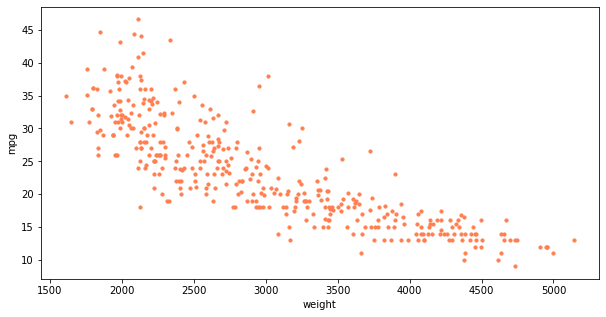

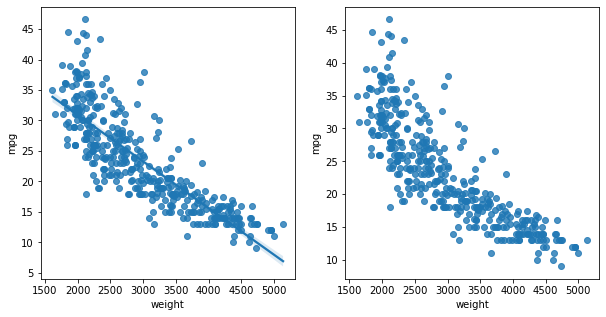

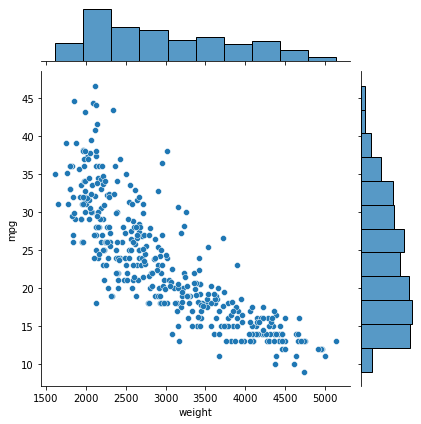

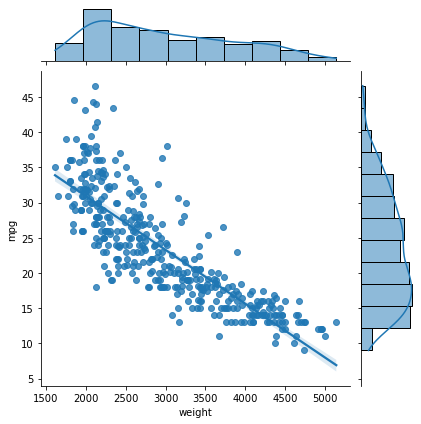

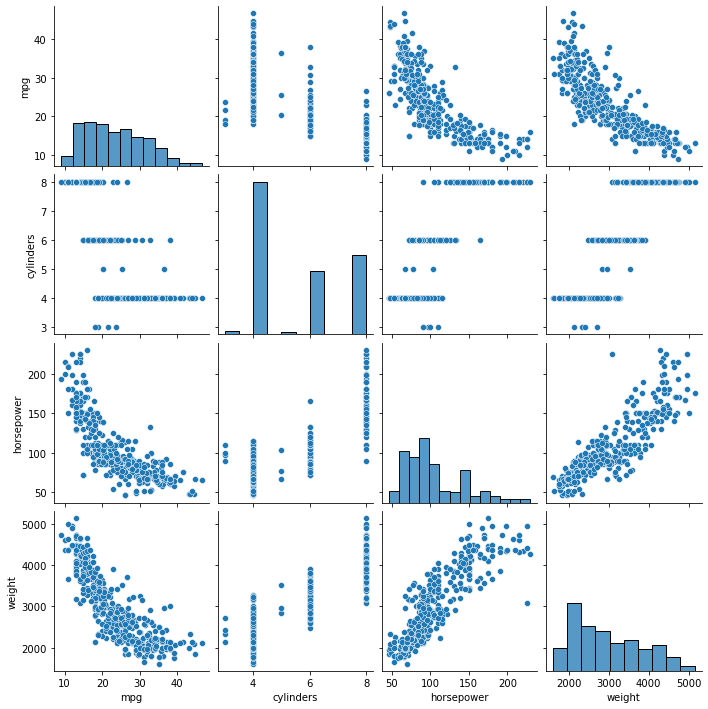

In [30]:
# [Step 3] 속성 선택

# 분석에 활용할 열 선택
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())
print('\n')

# 종속변수인 mpg와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind = 'scatter', x = 'weight', y = 'mpg', c = 'coral', s = 10, figsize = (10, 5))
plt.show()
plt.close()

# seaborn 라이브러리의 regplot() 함수를 이용하여 산점도 그리기
# 회귀선을 제거하려면 fit_reg = False 옵션 적용
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax = ax1) # 회귀선 표시
sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax = ax2, fit_reg = False) # 회귀선 미표시
plt.show()
plt.close()

# seaborn 라이브러리의 조인트 그래프 - 산점도, 히스토그램
# kind = 'reg' 옵션을 사용하면 회귀선 표시
sns.jointplot(x = 'weight', y = 'mpg', data = ndf) # 회귀선 없음
sns.jointplot(x = 'weight', y = 'mpg', kind = 'reg', data = ndf) # 회귀선 표시
plt.show()
plt.close()

# seaborn 라이브러리의 pairplot으로 두 변수 간의 모든 산점도 경우의 수 그리기
# 단, 자기 자신과의 관계는 히스토그램으로 표시
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

* Step 4 - 훈련/검증 데이터 분할
앞에서 그린 산점도를 통해 선형관계를 보이는 horsepower 열과 weight 열을 독립 변수 X로 선택하는 것을 고려<br>
두 변수 간의 회귀방정식을 찾기 위해 훈련 데이터와 검증 데이터로 나눠서 모형 구축<br>

In [33]:
# [Step 4] 데이터셋 구분 - 훈련용(train data) / 검증용(test data)

# 속성 선택
X = ndf[['weight']] # 일단 weight를 독립 변수로 선택, 반드시 2차원 배열로 선언해주어야 함
y = ndf['mpg']

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, # 독립 변수 
                                                    y, # 종속 변수
                                                    test_size = 0.3, # 검증 30% 
                                                    random_state = 10) # 랜덤 추출 값 (시드값 할당)

print('train data 개수 :', len(X_train))
print('test data 개수 :', len(X_test))

train data 개수 : 274
test data 개수 : 118


* Step 5 - 모형 학습 및 검증<br>
sklearn 라이브러리에서 선형회귀분석 모듈을 사용<br>
LinearRegressioin() 함수로 회귀분석 모형 객체를 생성하여 변수 lr에 저장<br>
모형 객체(lr)에 fit() 메소드를 적용하고 훈련 데이터(X_train, y_train)를 전달하면 모형이 학습을 통해 회귀방정식 계수 a, b을 찾음<br>
학습을 마친 모형의 예측 능력을 평가하기 위해 검증 데이터를 score() 메소드에 전달하여 lr 모형의 결정계수(R-제곱)를 구함<br>
결정계수 값이 클수록 모형의 예측 능력이 좋다고 판단

* 결정계수(R-제곱) review
종속변수의 분산 중에서 독립변수로 설명되는 비율을 의미한다. 즉, 통계 모델로 대상을 얼마나 잘 설명할 수 있는가를 나타낸 것이다.<br>

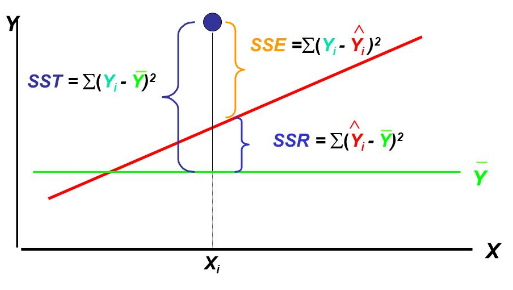
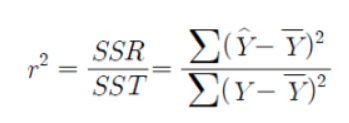

0.6822458558299325


기울기 a : [-0.00775343]


y절편 b : 46.710366257280086




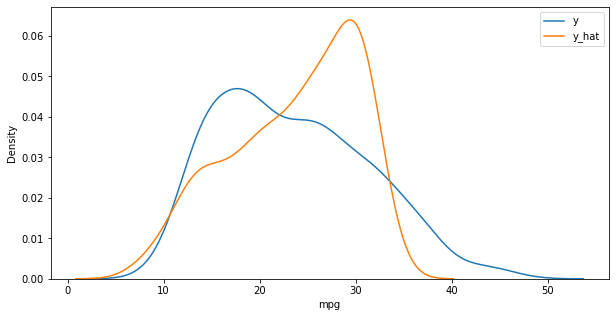

In [38]:
# [Step 5] 단순회귀분석 모형 만들기 - sklearn 사용

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('기울기 a :', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b :', lr.intercept_)
print('\n')

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
# 실제 y와 모형의 예측값 y_hat을 같은 화면에 분포도를 그려서 비교
# seaborn 라이브러리의 distplot() 함수를 사용
y_hat = lr.predict(X)

plt.figure(figsize = (10, 5))
ax1 = sns.kdeplot(y, label = 'y')
ax2 = sns.kdeplot(y_hat, label = 'y_hat', ax = ax1)
plt.legend()
plt.show()

## 2-2. 다항회귀분석
* 단순회귀분석 : 두 변수 간의 관계를 직선 형태로 설명하는 알고리즘
* 다항회귀분석(Polynomial Regression) : 2차함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘 

* 데이터 준비

In [44]:
# 단순회귀분석의 Step1 ~ Step4(훈련/검증 데이터 분할)까지 과정을 다시 이용

# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# [Step 1-4] 데이터 준비

df = pd.read_csv('./auto-mpg.csv', header = None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

# 데이터 확인
print(df.info(), '\n')
print(df['horsepower'].unique(), '\n')

# horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'].replace('?', np.nan, inplace = True)
print(df['horsepower'].isnull().sum(axis = 0), '\n') # 결측값 개수 확인
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

# 분석에 활용할 속성 선택
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data와 test data로 구분(7:3 비율)
X = ndf[['weight']] # 독립변수(반드시 2차원 배열이어야 함)
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print('훈련 데이터 :', X_train.shape)
print('검증 데이터 :', y_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None 

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' 

* 모형 학습 및 검증<br>
sklearn 라이브러리에서 선형회귀분석을 위한 LinearRegression() 함수와 다항식 변환을 위한 PolynomialFeatures() 함수를 불러옴<br>
옵션에 degree=2을 이용하여 2차항 객체인 poly를 생성<br>
독립 변수로 사용할 X_train 데이터를 fit_transform() 메소드에 전달하면 2차항 회귀분석에 맞게 변환<br>
X_train의 1개 열이 X_train_poly에서는 3개의 열로 늘어남

In [48]:
# [Step 5] 비선형회귀분석 모형 - sklearn 사용

# sklearn 라이브러리에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree = 2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train) # X_train 데이터를 2차항으로 변형

print('원 데이터 :', X_train.shape)
print('2차항 변환 데이터 :', X_train_poly.shape)

원 데이터 : (274, 1)
2차항 변환 데이터 : (274, 3)


In [49]:
# train data를 가지고 모형 학습
pr = LinearRegression() # 회귀분석 모형 객체를 생성
pr.fit(X_train_poly, y_train) # pr 모형을 학습

# 학습을 마친 모형에 test data를 적용하여 결정계수 계산
X_test_poly = poly.fit_transform(X_test) # X_test 데이터를 2차항으로 변경
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.7087009262975685


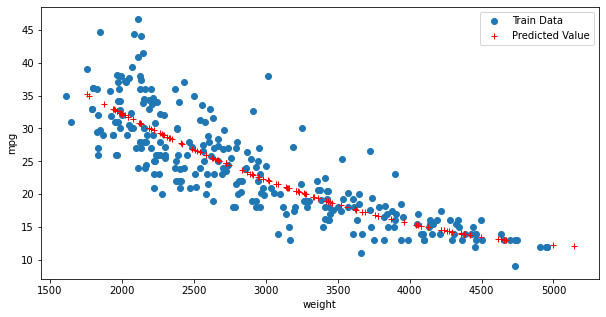

In [50]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
# 모형의 결정계수가 높아진 것에서 알 수 있듯이 직선으로 표시된 단순회귀분석에 비해 데이터의 패턴을 더욱 잘 설명
y_hat_test = pr.predict(X_test_poly) # 회귀모형으로 예측한 결과

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label = 'Train Data')
ax.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value')
ax.legend(loc = 'best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

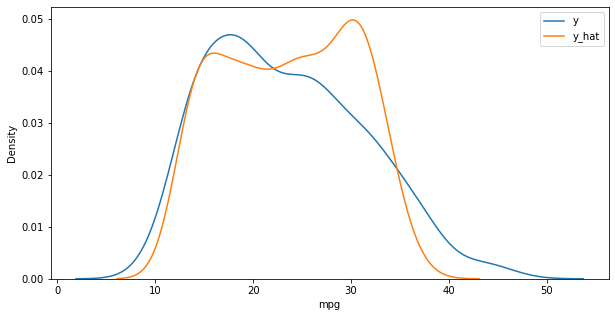

In [51]:
# 모형에 전체 X 데이터를 입력하여 예측한 y_hat을 실제 y와 비교

# 데이터셋의 전체 X 데이터를 2차항으로 변환하여 predict() 메소드에 전달
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize = (10, 5))
ax1 = sns.kdeplot(y, label = 'y')
ax2 = sns.kdeplot(y_hat, label = 'y_hat', ax = ax1)
plt.legend()
plt.show()

단순회귀분석의 결과와 비교할 때 데이터가 어느 한쪽으로 편향되는 경향이 상당히 감소

## 2-3. 다중회귀분석
* 단순회귀분석 : 종속 변수 Y에 영향을 주는 독립 변수 X가 하나인 경우
* 다중회귀분석 : 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우
* 수학적으로 종속변수 Y와 Xk의 관계를 Y = b + a1X1 + ... + anXn와 같은 함수식으로 표현
* 모형의 예측값인 종속 변수에 대한 실제 데이터를 알고 있는 상태에서 학습하기 때문에 지도학습으로 분류

* 데이터 준비<br>
단순회귀분석의 Step 1 ~ Step 4의 과정을 다시 정리

In [57]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# [Step 1~3] 데이터 준비
df = pd.read_csv('./auto-mpg.csv', header = None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

# horsepower 열의 자료형 변경(문자열 숫자)
print(df.info(), '\n')
print(df['horsepower'].unique(), '\n')
df['horsepower'].replace('?', np.nan, inplace = True)
print(df['horsepower'].isnull().sum(axis = 0), '\n')
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

# 분석에 활용할 속성 선택
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# [Step 4] 데이터셋 구분 - 훈련용 / 검증용
X = ndf[['cylinders', 'horsepower', 'weight']] # 독립변수 X1, X2, X3
y = ndf['mpg'] # 종속 변수 Y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print('훈련 데이터 :', X_train.shape)
print('검증 데이터 :', X_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None 

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' 

* 모형 학습 및 검증

In [59]:
# [Step 5] 다중회귀분석 모형 - sklearn 사용

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 계싼
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('X 변수의 계수 a :', lr.coef_)
print('\n')

# 회귀식의 y절편
print('상수항 b :', lr.intercept_)

0.6939048496695597


X 변수의 계수 a : [-0.60691288 -0.03714088 -0.00522268]


상수항 b : 46.41435126963408


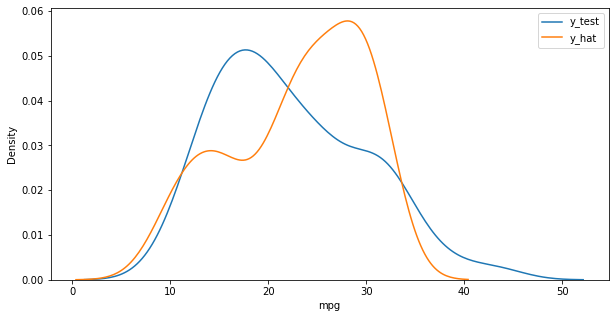

In [60]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat = lr.predict(X_test)

plt.figure(figsize = (10, 5))
ax1 = sns.kdeplot(y_test, label = 'y_test')
ax2 = sns.kdeplot(y_hat, label = 'y_hat', ax = ax1)
plt.legend()
plt.show()

단순회귀분석의 결과와 비교할 때 데이터가 한쪽으로 편향되는 경향은 그대로 남아 있지만 그래프의 첨도(뾰족한 정도)가 약간 누그러진 것을 볼 수 있음

# 3. 분류
* 분류(classification) : 예측하려는 대상의 속성(설명 변수)를 입력 받고, 목표 변수가 갖고 있는 카테고리(범주형) 값 중에서 어느 한 값으로 분류하여 예측
* 목표 변수 값(0 또는 1)이 있으므로 지도 학습 유형에 속함
* 고객 분류, 질병 진단, 스팸 메일 필터링, 음성 인식 등 목표 변수가 카테고리 값을 갖는 경우 사용함
* KNN, SVM, Decision Tree, Logistic Regression 등 다양한 알고리즘 존재

## 3-1. KNN
* KNN(K-Nearest-Neighbors) : k개의 가까운 이웃이라는 뜻
* 새로운 관측값이 주어지면 기존 데이터 중에서 가장 속성이 비슷한 k개의 이웃을 먼저 찾음
* 그리고 가까운 이웃들이 갖고 있는 목표 값과 같은 값으로 분류하여 예측
* k값에 따라 예측의 정확도가 달라지므로, 적절한 k값을 찾는 것이 매우 중요

* Step 1 - 데이터 준비

In [1]:
# 기본 라이브러리 불러오기 
import pandas as pd
import seaborn as sns

# [Step 1] 데이터 준비 - Seaborn에서 제공하는 titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')
print(df.head())
print('\n')

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C

* Step 2 - 데이터 탐색<br>
데이터의 특성과 분석 목표에 맞춰 누락 데이터를 처리함

In [2]:
# [Step 2] 데이터 탐색 / 전처리
print(df.info(), '\n') # age, deck, embark_town등 일부 열에 누락 데이터가 포함

# deck 열에는 유효한 값이 203개 뿐이므로 deck 열을 제거
# 승선도시를 나타내는 embark_town은 embarked 열과 동일한 의미를 가지므로 중복 없애기 위해 열 자체를 제거

# NaN 값이 많은 deck 열 삭제, embarked와 내용이 겹치는 embark_town 열 삭제
rdf = df.drop(['deck', 'embark_town'], axis = 1)
print(rdf.columns.values, '\n')

# age 열에는 누락데이터가 177개 정도 포함
# age 열에 나이 데이터가 없는 모든 행 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset = ['age'], how = 'any', axis = 0)
print(len(rdf), '\n')

# embarked 열의 NaN 값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna = True).idxmax()
print(most_freq, '\n')

print(rdf.describe(include = 'all')) # include = 'all' 옵션은 범주형 데이터에서의 통계값도 출력
print('\n')

rdf['embarked'].fillna(most_freq, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None 

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'clas

* Step 3 - 속성 선택<br>
변수로 사용할 후보 열을 선택

In [3]:
# [Step 3] 분석에 사용할 속성 선택

# 분석에 활용할 열 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
print(ndf.head())
print('\n')

# 원핫인코딩 - 범주형 데이터(sex, embarked)를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis = 1) # concat() 함수로 생성된 더미변수 열을 기존 데이터프레임에 연결
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix = 'town') # prefix 옵션을 이용해 열 이름에 접두어 'town'을 붙임
ndf = pd.concat([ndf, onehot_embarked], axis = 1)

ndf.drop(['sex', 'embarked'], axis = 1, inplace = True)
print(ndf.head())

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


* Step 4 - 훈련 / 검증 데이터 분할

In [4]:
# [Step 4] 데이터셋 구분 - 훈련용(train data) / 검증용(test data)

# 속성 선택
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male',
         'town_C', 'town_Q', 'town_S']] # 설명 변수 X
y = ndf['survived']

# 설명 변수 데이터를 정규화(normalization) : 설명 변수 열들이 갖는 데이터의 상대적 크기 차이를 없애기 위함
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print('train data 개수 :', X_train.shape)
print('test data 개수 :', X_test.shape)

train data 개수 : (499, 9)
test data 개수 : (215, 9)


* 분류 모형의 예측력을 평가하는 지표

1. Confusion Matrix(혼동행렬)<br>
모형을 예측하는 값에는 두 가지(True/False)가 있고, 각 예측값은 실제로 True이거나 False일 수 있다.<br>
다음 그림과 같이 모형의 예측값과 실제값을 각각 축으로 하는 2 X 2 매트릭스로 표현한 것을 Confusion Matrix라고 부른다.<br>
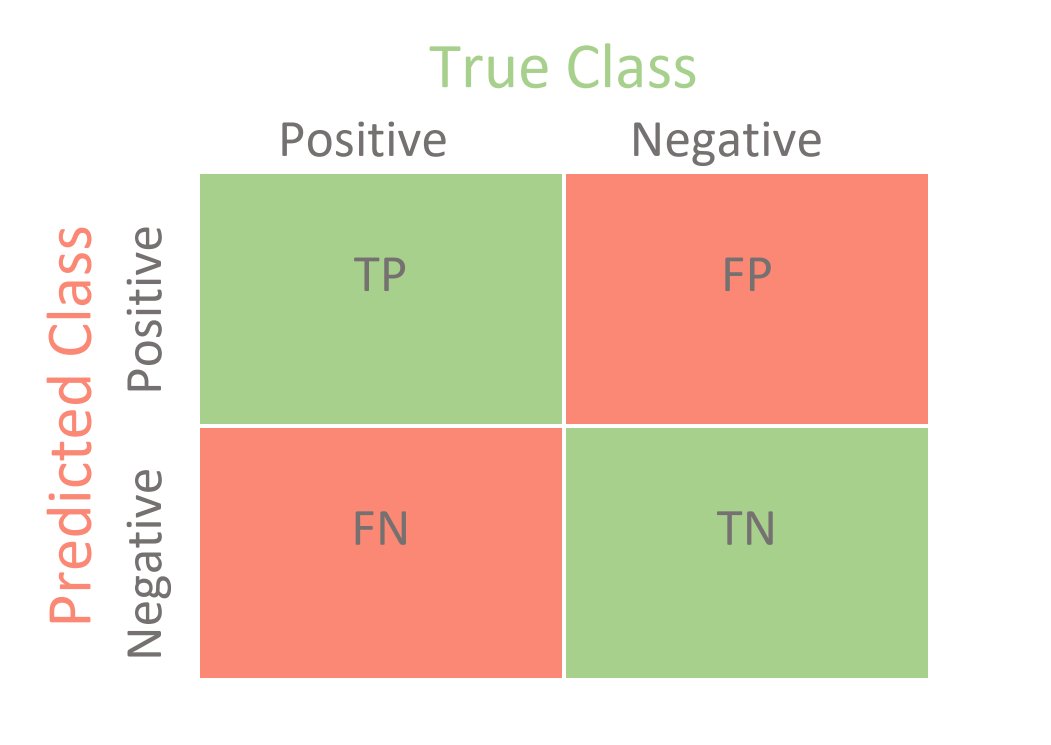

2. 정확도(Precision)<br>
True로 예측한 분석대상 중에서 실제 True인 비율을 말하며, 모형의 정확성을 나타내는 지표가 된다.<br>
정확도가 높다는 것인 False Positive(실제 False를 True로 예측) 오류가 작다는 뜻이다.<br>
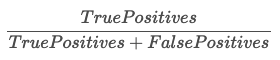

3. 재현율(Recall)<br>
실제 값이 True인 분석대상 중에서 True로 예측하여 모형이 적중한 비율을 말하며, 모형의 완전성을 나타내는 지표이다.<br>
재현율이 높다는 것은 False Negative(실제 True를 False로 잘못 예측) 오류가 낮다는 뜻이다.<br>
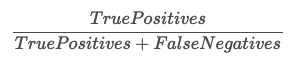

4. F1 지표(F1-score)<br>
정확도와 재현율이 균등하게 반영될 수 있도록 정확도와 재현율의 조화평균을 계산한 값으로, 모형의 예측력을 종합적으로 평가하는 지표이다.<br>
값이 높을수록 분류 모형의 예측력이 좋다고 말할 수 있다.<br>
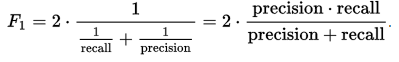

* Step 5 - 모형 학습 및 검증<br>
sklearn 라이브러리의 neighbors 모듈을 사용한다.<br>
KNeighborsClassifier() 함수로 KNN 분류 모형 객체를 생성하여 knn에 저장

In [5]:
# [Step 5] KNN 분류 모형 - sklearn 사용

# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성(k=5)
knn = KNeighborsClassifier(n_neighbors = 5)

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)

# test data를 가지고 y_hat을 예측(분류)
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [6]:
# 모형 성능 평가 - Confusion Matrix 계산
# [[TN, FP], [FN, TP]]의 형태로 반환됨
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

[[109  16]
 [ 25  65]]


In [7]:
# 모형 성능 평가 - 평가 지표 계산
# metrics 모듈의 classification_report() 함수 이용하여 precision, recall, f1-score 지표를 출력
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



## 3-2. SVM
* SVM(Support Vector Machine) : 벡터 공간에 위치한 훈련 데이터의 좌표와 각 데이터가 어떤 분류 값을 가져야 하는지 정답을 입력 받아 학습
* 같은 분류 값을 갖는 데이터끼리 같은 공간에 위치하도록 벡터 공간을 여러 조각으로 나눌 수 있다면, 새로운 데이터에 대해서도 어느 공간에 위치하는지 분류 가능

* 데이터 준비

In [20]:
# 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns


# [Step 1] 데이터 준비 / 기본 설정
df = sns.load_dataset('titanic')

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


# [Step 2] 데이터 탐색 / 전처리
print(df.info())

# NaN 값이 많은 deck 열 삭제, embarked와 내용이 겹치는 embark_town 열 삭제
rdf = df.drop(['deck', 'embark_town'], axis = 1)

# age 열에 나이 데이터가 없는 행 모두 삭제
rdf = rdf.dropna(subset = ['age'], axis = 0, how = 'any')

# embarked 열의 NaN 값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna = True).idxmax()
rdf['embarked'].fillna(most_freq, inplace = True)


# [Step 3] 분석에 사용할 속성 선택
# 분석에 활용할 열(속성) 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis = 1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix = 'town')
ndf = pd.concat([ndf, onehot_embarked], axis = 1)

ndf.drop(['sex', 'embarked'], axis = 1, inplace = True)


# [Step 4] 데이터셋 구분 - 훈련용(train data) / 검증용(test data)

# 속성(변수) 선택
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']] # 독립 변수 X
y = ndf['survived'] # 종속변수 Y

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print('train data 개수:', X_train.shape)
print('test data 개수:', X_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
train data 개수: (499, 9)
test data 개수: (215, 9)


* 모형 학습 및 검증<br>
sklearn에서 가져온 svm 모듈의 SVC() 함수를 사용하여 모형 객체(svm_model)를 생성<br>
이 때, 데이터를 벡터 공간으로 매핑하는 함수를 커널(kernel)이라고 하는데, kernel = 'rbf' 옵션으로 RBF 함수를 적용<br>
이 외에도 Linear, Polynomial, Sigmoid 등의 커널이 있음

In [21]:
# [Step 5] SVM 분류 모형 - sklearn 사용
# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

# 모형 객체 생성(kernel = 'rbf' 적용)
svm_model = svm.SVC(kernel = 'rbf')

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)

# test data를 가지고 y_hat 예측(분류)
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [23]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가 지표 계산
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

[[120   5]
 [ 35  55]]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



## 3-3. Decision Tree
* Decision Tree(의사결정나무) : 트리 구조를 사용하고, 각 분기점(node)에는 분석 대상의 속성(설명 변수)들이 위치, 각 분기점마다 목표 값을 가장 잘 분류할 수 있는 속성을 찾아 배치하고, 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듦
* 각 분기점에서 최적의 속성을 선택할 때는 해당 속성을 기준으로 분류한 값들이 구분되는 정도를 측정
* 다른 종류의 갑슬이 섞여 있는 정도를 나타내는 Entropy를 주로 활용하는데, Entropy가 낮을수록 분류가 잘 된 것
* Entropy가 일정 수준 이하로 낮아질 때까지 앞의 과정을 반복

* 데이터 준비

In [38]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np


# [Step 1] 데이터 준비 / 기본 설정

# Breast Cancer 데이터셋 가져오기
uci_path = './breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header = None)

# 열 이름 지정
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


# [Step 2] 데이터 탐색

# 데이터 살펴보기
print(df.head(), '\n')

# 데이터 자료형 확인
print(df.info(), '\n')

# 데이터 통계 요약 정보 확인
print(df.describe(), '\n')

# bare_nuclei 열의 자료형 변경(문자열 -> 숫자)
print(df['bare_nuclei'].unique(), '\n') # '?' 가 포함되어 있음

df['bare_nuclei'].replace('?', np.nan, inplace = True) # '?'을 np.nan으로 변경
df.dropna(subset = ['bare_nuclei'], how = 'any', axis = 0, inplace = True) # 누락 데이터 행 삭제
df['bare_nuclei'] = df['bare_nuclei'].astype('int') # 문자열을 정수형으로 변환

print(df.describe(), '\n')


# [Step 3] 데이터셋 구분 - 훈련용(train data) / 검증용(test data)

# 속성(변수) 선택
X = df[['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
        'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']]
y = df['class']

# 설명 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print('train data 개수:', X_train.shape)
print('test data 개수:', X_test.shape)

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   cl

* 모형 학습 및 검증<br>
sklearn 라이브러리의 tree 모듈을 임포트한다. DecisionTreeClassifier() 함수를 사용하여 모형 객체(model_tree)를 생성한다.<br>
각 분기점에서 최적의 속성을 찾기 위해 분류 정도를 평가하는 기준으로 'entropy' 값을 사용한다.<br>
트리 레벨을 5로 지정하는데, 5단계까지 가지를 확장할 수 있다는 뜻이다.<br>
레벨이 많아질수록 모형 학습에 사용하는 훈련 데이터에 대한 예측은 정확해지지만, 훈련 데이터에 대해서만 지나치게 최적화되어 실제 데이터 예측 능력은 떨어지는 문제가 발생한다. 따라서 적정한 레벨값을 찾는 것이 중요하다.<br>

In [39]:
# [Step 4] Decision Tree 분류 모형 - sklearn 사용

# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

# 모형 객체 생성(criterion = 'entropy' 적용)
tree_model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

# train data를 가지고 모형 학습
tree_model.fit(X_train, y_train)

# test data를 가지고 y_hat 예측(분류)
y_hat = tree_model.predict(X_test) # 2 : benign(양성), 4 : malignant(악성)

print(y_hat[0:10])
print(y_test.values[0:10])

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


In [41]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)
print('\n')

# 모형 성능 평가 - 평가 지표 계산
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

[[127   4]
 [  2  72]]


              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



# 4. 군집
* 군집(clustering) 분석 : 데이터셋의 관측값이 갖고 있는 여러 속성을 분석하여 서로 비슷한 특징을 갖는 관측값끼리 같은 클러스터(집단)로 묶는 알고리즘
* 다른 클러스터 간에는 서로 완전하게 구분되는 특징을 갖기 때문에 어느 클러스터에도 속하지 못하는 관측값이 존재할 수 있음
* 이런 특성을 이용하여 특이 데이터(이상값, 중복값 등)를 찾는데 활용하기도 함
* 한편 군집 분석은 비지도학습 유형임
* 군집 분석은 정답이 없는 상태에서 데이터 자체의 유사성만을 기준으로 판단하는 점에서 정답을 알고 있는 상태에서 학습 과정을 거치는 분류 알고리즘과 차이가 있음
* 군집 알고리즘은 신용카드 부정 사용 탐지, 구매 패턴 분석 등 소비자 행동 특성을 그룹화하는데 사용됨
* 여러 알고리즘 중 k-Means 알고리즘과 DBSCAN 알고리즘에 대해 알아봄

## 4-1. k-Means
* k-Means 알고리즘 : 데이터 간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지의 거리를 이용함
* 벡터 공간에 위치한 어떤 데이터에 대하여 k개의 클러스터가 주어졌을 대 클러스트의 중심까지 거리가 가장 가까운 클러스터로 해당 데이터를 할당
* 몇 개의 클러스터로 데이터를 구분할 것인지를 결정하는 k값에 따라 모형의 성능이 달라짐
* 일반적으로 k가 클수록 모형의 정확도는 개선되지만, k값이 너무 커지면 선택지가 너무 많아지므로 분석의 효과가 사라짐
* 즉, n개의 d-차원 개체 집합이 주어졌을 대, n개의 개체들을 각클러스터 내 개체 간 응집도를 최대로 하는 k개의 클러스터로 분할한다. 즉, mi가 클러스터 Si의 중심점이라고 할 때 각 클러스터별 중심점~클러스터내 개체 간 거리의 제곱합을 최소로 하는 클러스터 S를 찾는 것이 이 알고리즘의 목표<br>
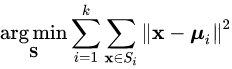

* 데이터 준비

In [48]:
# 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt


# [Step 1] 데이터 준비

# Wholesale customers 데이터셋 가져오기
df = pd.read_csv('./Wholesale customers data.csv', header = 0)


# [Step 2] 데이터 탐색

# 데이터 살펴보기
print(df.head(), '\n')

# 데이터 자료형 확인
print(df.info(), '\n')

# 데이터 통계 요약 정보 확인
print(df.describe(), '\n')

# [Step 3] 데이터 전처리
# 비지도 학습 모형이므로 예측 변수를 지정할 필요가 없고 필요한 속성을 모두 설명 변수로 활용
# StandardScaler() 함수 등을 이용하여 학습 데이터를 정규화
# 이를 통해 서로 다른 변수 사이에 존재할 수 있는 데이터 값의 상대적 크기 차이에서 발생하는 오류 제거

# 분석에 사용할 속성 선택
X = df.loc[:, :]
print(X[:5], '\n') # 데이터프레임 행 슬라이싱, 마지막 값 빠짐

# 설명 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

* 모형 학습 및 검증<br>
sklearn 라이브러리의 cluster 모듈을 활용<br>
KMeans() 함수로 모형 객체를 생성하고, n_clusters 옵션을 사용하여 클러스터 개수를 5로 지정

In [50]:
# [Step 4] k-means 군집 모형 - sklearn 사용

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성
# init 옵션 : 초기에 군집 중심점의 좌표를 설정할 방식
# n_init 옵션 : 서로 다른 군집 중심점을 최초 셋팅
kmeans = cluster.KMeans(init = 'k-means++', n_clusters = 5, n_init = 10) 

# 모형 학습
kmeans.fit(X)

# 예측(군집)
cluster_label = kmeans.labels_
print(cluster_label, '\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

[0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 3 0 3 0 3 0 3 3 1 0 0 3 3 0 3 3 3 3 3 3 0 3
 0 0 3 3 3 0 0 0 0 0 1 0 0 3 3 0 0 3 3 1 0 3 3 0 1 0 0 3 1 3 0 3 3 3 3 3 0
 0 3 3 0 3 3 3 0 0 3 0 1 1 3 3 3 3 3 1 3 0 3 0 3 3 3 0 0 0 3 3 3 0 0 0 0 3
 0 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3
 3 3 3 3 3 3 3 0 0 3 0 0 0 3 3 0 0 0 0 3 3 3 0 0 3 0 3 0 3 3 3 3 3 4 3 4 3
 3 3 3 0 0 3 3 3 0 3 3 2 0 2 2 0 0 2 2 2 0 2 2 2 0 2 1 2 2 0 2 0 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 0 2 2 2 2 3 3 3 3 3 3 0 3 0 3 3 3 3 3 3 3 3 3 3 3 0 2 0
 2 0 0 2 0 0 0 0 0 0 0 2 2 0 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 4 2 2 2 2 2 0 2
 1 2 0 2 2 2 2 0 0 3 0 3 3 0 0 3 0 3 0 3 0 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3
 0 3 3 0 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3
 0 0 3 3 3 3 3 3 0 0 3 0 3 3 0 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3] 

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

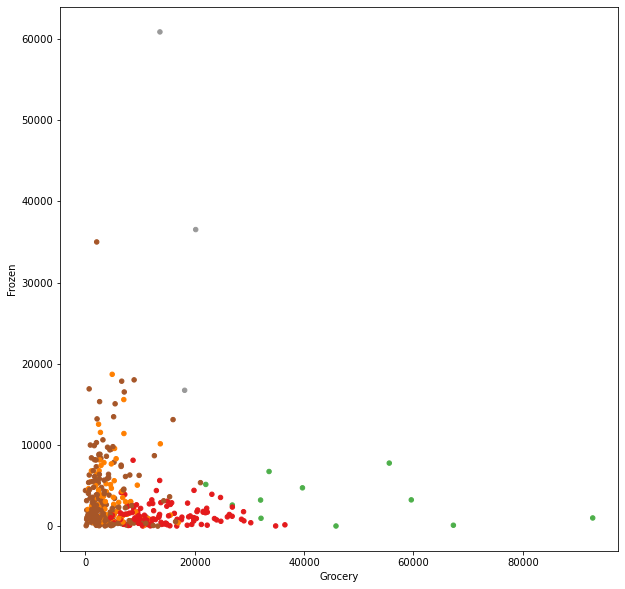

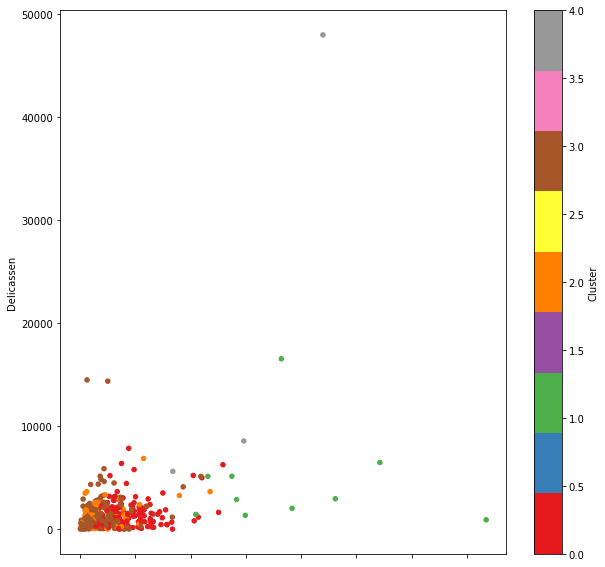

In [53]:
# 모형은 8개의 속성(변수)를 이용하여 각 관측값을 5개의 클러스터로 구분
# 8개의 변수를 하나의 그래프로 표현할 수 없기 때문에 2개의 변수를 선택하여 관측값의 분포를 그림
# 단, 모형의 예측값은 매번 실행할 때마다 달라지므로 그래프 형태도 달라지는 점에 유의

df.plot(kind = 'scatter', x = 'Grocery', y = 'Frozen', c = 'Cluster', cmap = 'Set1',
        colorbar = False, figsize = (10, 10))
df.plot(kind = 'scatter', x = 'Milk', y = 'Delicassen', c = 'Cluster', cmap = 'Set1',
        colorbar = True, figsize = (10, 10))
plt.show()
plt.close()

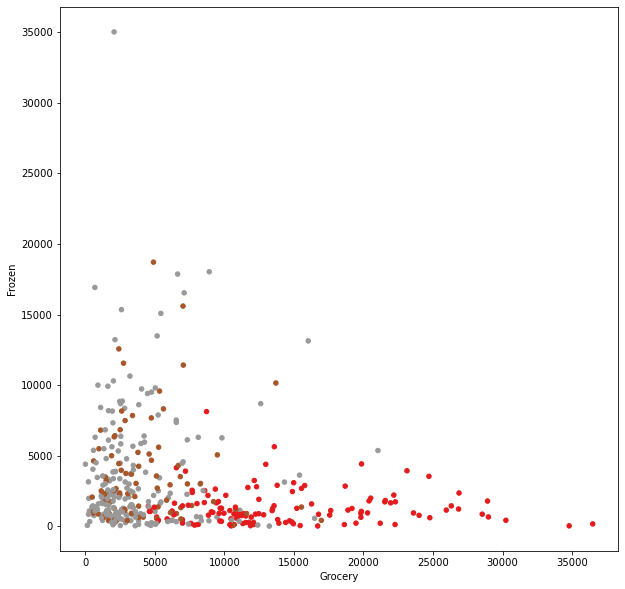

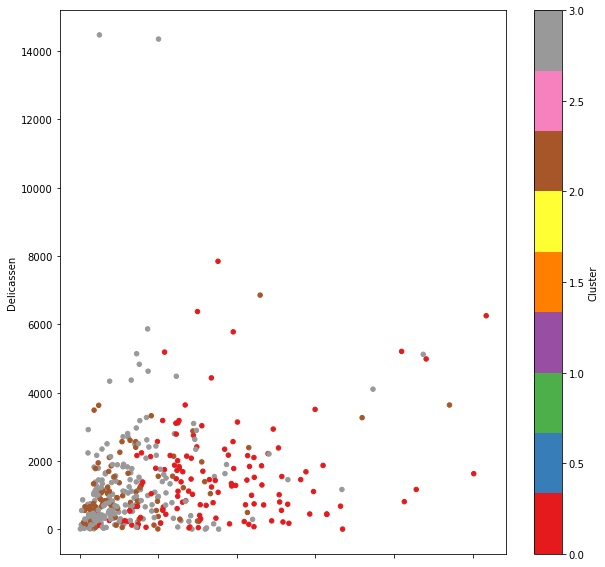

In [56]:
# 다른 값들에 비해 지나치게 큰 값으로 구성되는 클러스터에 속하는 값을 제외하고 다시 그림
# 즉, 데이터들이 몰려 있는 구간을 확대해서 자세하게 파악 가능
# 클러스터 라벨이 1, 4인 데이터를 제외하고 클러스터 1, 2, 3에 속하는 데이터만을 변수 ndf에 저장

# 큰 값으로 구성된 클러스터(1, 4) 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 1) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind = 'scatter', x = 'Grocery', y = 'Frozen', c = 'Cluster',  cmap = 'Set1',
         colorbar = False, figsize = (10, 10))
ndf.plot(kind = 'scatter', x = 'Milk', y = 'Delicassen', c = 'Cluster', cmap = 'Set1',
         colorbar = True, figsize = (10, 10))
plt.show()
plt.close()

## 4-2. DBSCAN
* DBSCAN(Density-Based Spatial Clustering of Applications with Noise) : 데이터가 위치하고 있는 공간 밀집도를 기준으로 클러스터 구분
* 자기를 중심으로 반지름 R의 공간에 최소 M개의 포인트가 존재하는 점을 `코어 포인트(core point)`라고 부름
* 코어 포인트는 아니지만 반지름 R 안에 다른 코어 포인트가 있을 경우 `경계 포인트(border point)`라고 부름
* 코어 포인트도 아니고 경계 포인트에도 속하지 않는 점을 `Noise(또는 outlier)`라고 분류
* 하나의 클러스트는 반지름 R 안에 서로 위치하는 모든 코어 포인트를 포함하는 방식으로 구성
* 당연히 각 코어 포인트 주위에 있는 경계 포인트를 포함
* 서로 밀접한 데이터끼리 하나의 클러스터를 구성하게 되고 어느 클러스터에도 속하지 않는 점들은 Noise로 남게 됨
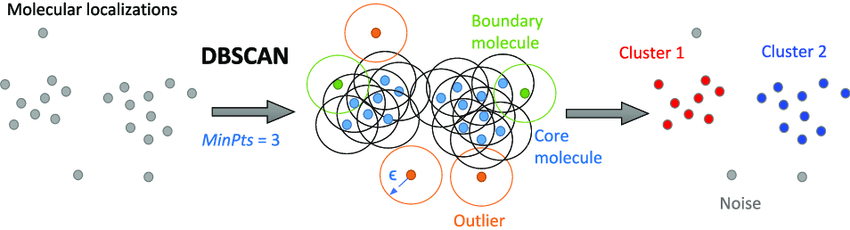

* 데이터 준비<br>
고등학교 진학률 데이터를 활용하여 속성이 비슷한 중학교끼리 클러스터를 만듦

In [66]:
# 기본 라이브러리 불러오기
import pandas as pd
import folium # 지도 시각화 도구

# [Step 1] 데이터 준비 / 기본 설정
# 서울시내 중학교 진학률 데이터셋
file_path = './2016_middle_shcool_graduates_report.xlsx'
df = pd.read_excel(file_path, header = 0, engine = 'openpyxl', index_col = 'Unnamed: 0')

# IPython Console 디스플레이 옵션 설정
pd.set_option('display.width', None) # 출력 화면의 너비
pd.set_option('display.max_rows', 100) # 출력할 행의 개수 한도
pd.set_option('display.max_columns', 10) # 출력할 열의 개수 한도
pd.set_option('display.max_colwidth', 20) # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True) # 유니코드 사용 너비 조정

# 열 이름 배열 출력
print(df.columns.values)

['지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고' '외고_국제고'
 '예고_체고' '마이스터고' '자사고' '자공고' '기타진학' '취업' '미상' '위도' '경도']


In [67]:
# [Step 2] 데이터 탐색

# 데이터 살펴보기
print(df.head(), '\n')

# 데이터 자료형 확인
print(df.info(), '\n')

# 데이터 통계 요약 정보 확인
print(df.describe())

     지역                               학교명  코드  유형  주야  ...  \
0  성북구  서울대학교사범대학부설중학교.....       3  국립  주간  ...   
1  종로구  서울대학교사범대학부설여자중학교...     3  국립  주간  ...   
2  강남구           개원중학교                     3  공립  주간  ...   
3  강남구           개포중학교                     3  공립  주간  ...   
4  서초구           경원중학교                     3  공립  주간  ...   

   기타진학  취업   미상       위도        경도  
0     0.004     0  0.000  37.594942  127.038909  
1     0.031     0  0.000  37.577473  127.003857  
2     0.009     0  0.003  37.491637  127.071744  
3     0.019     0  0.000  37.480439  127.062201  
4     0.010     0  0.000  37.510750  127.008900  

[5 rows x 20 columns] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 414
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      415 non-null    object 
 1   학교명     415 non-null    object 
 2   코드      415 non-null    int64  
 3   유형      415 non-null    object 
 4   주야     

In [71]:
# 각 학교의 위도, 경도 정보를 이용하여 지도에 위치 표시 (지도 만들기)
mschool_map = folium.Map(location=[37.55, 126.98], tiles = 'Stamen Terrain',
                         zoom_start = 12) # zoom_start 옵션은 배율 설정

# 중학교 위치 정보를 CircleMarker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius = 5, # 원의 반지름
                        color = 'brown', # 원의 둘레 색상
                        fill = True, 
                        fill_color = 'coral', # 원을 채우는 색
                        fill_opacity = 0.7, # 투명도
                        popup = name # popup 옵션에 학교명을 할당하여 원형 마커를 클릭 시 학교명이 팝업으로 표시
    ).add_to(mschool_map)
    
# 지도를 html 파일로 저장하기
mschool_map.save('./seoul_mschool_location.html')

In [75]:
# [Step 3] 데이터 전처리

# 원핫인코딩(더미변수)
# 열 '지역', '코드', '유형', '주야'는 모형이 인식할 수 없는 문자열 데이터이므로 더미변수로 변환 필요

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder() # one hot encoder 생성

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

print(df.head())

     지역                               학교명  코드  유형  주야  ...  \
0  성북구  서울대학교사범대학부설중학교.....       3  국립  주간  ...   
1  종로구  서울대학교사범대학부설여자중학교...     3  국립  주간  ...   
2  강남구           개원중학교                     3  공립  주간  ...   
3  강남구           개포중학교                     3  공립  주간  ...   
4  서초구           경원중학교                     3  공립  주간  ...   

         경도  location  code  type  day  
0  127.038909        16     0     1    0  
1  127.003857        22     0     1    0  
2  127.071744         0     0     0    0  
3  127.062201         0     0     0    0  
4  127.008900        14     0     0    0  

[5 rows x 24 columns]


* 모형 학습 및 검증<br>
과학고, 외고_국제고, 자사고 열을 선택하여 설명변수 X로 할당<br>
StandardScaler() 메소드로 정규화 처리하고, cluster 모듈의 DBSCAN() 함수를 적용하여 모형 객체(dbm)을 생성<br>
밀도 계산의 기준이 되는 반지름 R(eps = 0.2)과 최소 포인트 개수 M(min_samples = 5)을 옵션에 설정<br>

In [78]:
# [Step 4] DBSCAN 군집 모형 - sklearn 사용

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 분석에 사용할 속성 선택(과학고, 외고국제고, 자사고 진학률)
columns_list = [9, 10, 13]
X = df.iloc[:, columns_list]
print(X[:5])
print('\n')

# 설명 변수 데이터 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# DBSCAN 모형 객체 생성
dbm = cluster.DBSCAN(eps = 0.2, min_samples = 5)

# 모형 학습
dbm.fit(X)

# 예측(군집)
cluster_label = dbm.labels_ # 클러스터 확인
print(cluster_label) # -1은 Noise이므로 0, 1, 2, 3으로 총 4개의 클러스터
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

   과학고  외고_국제고  자사고
0   0.018        0.007   0.227
1   0.000        0.035   0.043
2   0.009        0.012   0.090
3   0.013        0.013   0.065
4   0.007        0.010   0.282


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  2 -1  0 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0  3 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1  0
 -1 -1 -1  0 -1 -1 -1 -1  0 -1  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1
 -1 -1  0 -1 -1 -1  0  2  0  0  0  0  0 -1 -1 -1  0 -1  0 -1 -1  0 -1  0
 -1  0  0 -1 -1 -1 -1  1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0  1 -1
 -1  0  2  0 -1 -1  1 -1 -1 -1  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1
 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  0 -1  0  0 -1 -1
 -1 -1 -1  0 -1 -1 -1  1  0  3  1 -1  0  0 -1  0 -1 -1  0  0  2 -1 -1  3
  0  0 -1 -1 -1 -1  0 -1  0  0 -1  0  0  0 -1 -1  0 -1 -1 -1 -1 -1  2  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1  3  0  2 -1 -1
 -1 -1  0 -1 -1 -1  

In [81]:
# groupby() 메소드를 사용하여 cluster 열을 기준으로 데이터프레임을 그룹 객체로 변환
# 지도에 다른 색으로 구분하여 그룹별 분포를 살펴봄
# Noise(-1)의 경우 회색으로 설정

# 클러스터 값으로 그룹화하고 그룹별로 내용 출력(첫 5행만 출력)
grouped_cols = [0, 1, 3] + columns_list # 출력하고자 하는 열 설정
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))
    print(group.iloc[:, grouped_cols].head())
    print('\n')
    
# 그래프로 표현 - 시각화
colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple',
          5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan', 11:'tan'}

cluster_map = folium.Map(location=[37.55, 126.98], tiles = 'Stamen Terrain',
                         zoom_start = 12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):
    folium.CircleMarker([lat, lng],
                        radius = 5,
                        color = colors[clus],
                        fill = True,
                        fill_color = colors[clus],
                        fill_opacity = 0.7,
                        popup = name
    ).add_to(cluster_map)
    
# 지도를 html 파일로 저장하기
cluster_map.save('./seoul_mschool_cluster.html')

* key : -1
* number : 255
     지역                               학교명  유형  과학고  외고_국제고  \
0  성북구  서울대학교사범대학부설중학교.....    국립   0.018        0.007   
1  종로구  서울대학교사범대학부설여자중학교...  국립   0.000        0.035   
2  강남구           개원중학교                  공립   0.009        0.012   
3  강남구           개포중학교                  공립   0.013        0.013   
4  서초구           경원중학교                  공립   0.007        0.010   

   자사고  
0   0.227  
1   0.043  
2   0.090  
3   0.065  
4   0.282  


* key : 0
* number : 102
      지역          학교명  유형  과학고  외고_국제고  자사고
13  서초구  동덕여자중학교  사립     0.0        0.022   0.038
22  강남구      수서중학교  공립     0.0        0.019   0.044
28  서초구      언남중학교  공립     0.0        0.015   0.050
34  강남구      은성중학교  사립     0.0        0.016   0.065
43  송파구      거원중학교  공립     0.0        0.021   0.054


* key : 1
* number : 45
         지역          학교명  유형  과학고  외고_국제고  자사고
46     강동구      동신중학교  사립     0.0          0.0   0.044
103    양천구      신원중학교  공립     0.0          0.0   0.006
118    구로구     

In [86]:
# 앞에서 사용한 속성에 학교 설립 유형(국립, 공립, 사립)을 추가하여 분석
# type 열에 원핫벡터 형태로 정리된 값 사용 (22번째 열)
# 모형의 예측값이 -1인 Noise의 개수가 281로 늘어나는 경향 보임
# 0부터 10까지 11개의 클러스터로 구분

# X2 데이터셋에 대하여 위 과정을 반복
columns_list2 = [9, 10, 13, 22]
X2 = df.iloc[:, columns_list2]
print(X2[:5])
print('\n')

X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2 = cluster.DBSCAN(eps = 0.2, min_samples = 5)
dbm2.fit(X2)
df['Cluster2'] = dbm2.labels_
print(df.head(), '\n')

grouped2_cols = [0, 1, 3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key, group in grouped2:
    print('* key :', key)
    print('* group :', len(group))
    print(group.iloc[:, grouped2_cols].head())
    print('\n')
    
cluster2_map = folium.Map(location = [37.55, 126.98], tiles = 'Stamen Terrain',
                          zoom_start = 12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):
    folium.CircleMarker([lat, lng],
                        radius = 5,
                        color = colors[clus],
                        fill = True,
                        fill_color = colors[clus],
                        fill_opacity = 0.7,
                        popup = name
    ).add_to(cluster2_map)
    
# 지도를 html 파일로 저장하기
cluster2_map.save('./seoul_mschool_cluster2.html')

   과학고  외고_국제고  자사고  type
0   0.018        0.007   0.227     1
1   0.000        0.035   0.043     1
2   0.009        0.012   0.090     0
3   0.013        0.013   0.065     0
4   0.007        0.010   0.282     0


     지역                               학교명  코드  유형  주야  ...  code  \
0  성북구  서울대학교사범대학부설중학교.....       3  국립  주간  ...     0   
1  종로구  서울대학교사범대학부설여자중학교...     3  국립  주간  ...     0   
2  강남구           개원중학교                     3  공립  주간  ...     0   
3  강남구           개포중학교                     3  공립  주간  ...     0   
4  서초구           경원중학교                     3  공립  주간  ...     0   

   type  day  Cluster  Cluster2  
0     1    0       -1        -1  
1     1    0       -1        -1  
2     0    0       -1        -1  
3     0    0       -1        -1  
4     0    0       -1        -1  

[5 rows x 26 columns] 

* key : -1
* group : 281
     지역                               학교명  유형  과학고  외고_국제고  \
0  성북구  서울대학교사범대학부설중학교.....    국립   0.018        0.007   
1  종로구  서울대학교사범대학부설여자중학교...  

In [90]:
# DBSCAN 모형에 입력하는 속성을 2개로 줄여서 예측
# 과학고, 외고_국제고 진학률 데이터만 사용
# Noise가 61개로 줄어들고, 0부터 6까지 7개의 클러스터로 구분됨

# X3 데이터셋에 대하여 위의 과정을 반복(과학고, 외고_국제고)
columns_list3 = [9, 10]
X3 = df.iloc[:, columns_list3]
print(X3[:5])
print('\n')

X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
dbm3 = cluster.DBSCAN(eps = 0.2, min_samples = 5)
dbm3.fit(X3)
df['Cluster3'] = dbm3.labels_

grouped3_cols = [0, 1, 3] + columns_list3
grouped3 = df.groupby('Cluster3')
for key, group in grouped3:
    print('* key :', key)
    print('* number :', len(group))
    print(group.iloc[:, grouped3_cols].head())
    print('\n')
    
cluster3_map = folium.Map(location = [37.55, 126.98], tiles = 'Stamen Terrain',
                          zoom_start = 12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):
    folium.CircleMarker([lat, lng],
                        radius = 5,
                        color = colors[clus],
                        fill = True,
                        fill_color = colors[clus],
                        fill_opacity = 0.7,
                        popup = name
    ).add_to(cluster3_map)
    
# 지도를 html 파일로 저장하기
cluster3_map.save('./seoul_mschool_cluster3.html')

   과학고  외고_국제고
0   0.018        0.007
1   0.000        0.035
2   0.009        0.012
3   0.013        0.013
4   0.007        0.010


* key : -1
* number : 61
     지역                             학교명  유형  과학고  외고_국제고
0  성북구  서울대학교사범대학부설중학교.....  국립   0.018        0.007
3  강남구           개포중학교                공립   0.013        0.013
6  강남구         압구정중학교                공립   0.015        0.036
7  강남구  단국대학교사범대학부속중학교.....  사립   0.032        0.005
8  강남구           대명중학교                공립   0.013        0.029


* key : 0
* number : 160
      지역                               학교명  유형  과학고  외고_국제고
1   종로구  서울대학교사범대학부설여자중학교...  국립     0.0        0.035
13  서초구       동덕여자중학교                  사립     0.0        0.022
22  강남구           수서중학교                  공립     0.0        0.019
28  서초구           언남중학교                  공립     0.0        0.015
29  강남구           언북중학교                  공립     0.0        0.007


* key : 1
* number : 111
      지역      학교명  유형  과학고  외고_국제고
2   강남구  개원중학교  공립   0.009        